# COVID Global ScratchPad 

Do the same using Global data from John Hopkins University

https://github.com/CSSEGISandData/COVID-19   

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


In [463]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import pandas as pd
import requests

dfc_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dfd_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

dfc_g = dfc_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfc_graw.columns[-1], ascending=False)
dfc_g = dfc_g.transpose()  
dfc_g.index = pd.to_datetime(dfc_g.index)
display('cases',dfc_g.tail())
display('chg in cases',dfc_g.tail().diff(axis=0))

dfd_g = dfd_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfd_graw.columns[-1], ascending=False)
dfd_g = dfd_g.transpose().tail(40)  # last 40 days ?
dfd_g.index = pd.to_datetime(dfd_g.index) 
display('deaths',dfd_g.tail())
display('chg in deaths',dfd_g.tail().diff(axis=0))

#display('details of', dfd_g['Sudan'].tail(15), dfc_g['Sudan'].tail(15))


'cases'

Country/Region,US,Spain,Italy,France,Germany,China,Iran,United Kingdom,Turkey,Belgium,...,Mauritania,Botswana,Bhutan,Western Sahara,Gambia,Sao Tome and Principe,Burundi,Papua New Guinea,South Sudan,Timor-Leste
2020-04-04,308850,126168,124632,90848,96092,82543,55743,42477,23934,18431,...,6,4,5,0,4,0,3,1,0,1
2020-04-05,337072,131646,128948,93773,100123,82602,58226,48436,27069,19691,...,6,6,5,4,4,0,3,1,1,1
2020-04-06,366667,136675,132547,98963,103374,82665,60500,52279,30217,20814,...,6,6,5,4,4,4,3,2,1,1
2020-04-07,396223,141942,135586,110065,107663,82718,62589,55949,34109,22194,...,6,6,5,4,4,4,3,2,2,1
2020-04-08,429052,148220,139422,113959,113296,82809,64586,61474,38226,23403,...,6,6,5,4,4,4,3,2,2,1


'chg in cases'

Country/Region,US,Spain,Italy,France,Germany,China,Iran,United Kingdom,Turkey,Belgium,...,Mauritania,Botswana,Bhutan,Western Sahara,Gambia,Sao Tome and Principe,Burundi,Papua New Guinea,South Sudan,Timor-Leste
2020-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-05,28222.0,5478.0,4316.0,2925.0,4031.0,59.0,2483.0,5959.0,3135.0,1260.0,...,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-04-06,29595.0,5029.0,3599.0,5190.0,3251.0,63.0,2274.0,3843.0,3148.0,1123.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0
2020-04-07,29556.0,5267.0,3039.0,11102.0,4289.0,53.0,2089.0,3670.0,3892.0,1380.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-04-08,32829.0,6278.0,3836.0,3894.0,5633.0,91.0,1997.0,5525.0,4117.0,1209.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'deaths'

Country/Region,Italy,Spain,US,France,United Kingdom,Iran,China,Germany,Netherlands,Belgium,...,Equatorial Guinea,Guinea,Dominica,South Sudan,Djibouti,Guinea-Bissau,Papua New Guinea,Holy See,Chad,Eswatini
2020-04-04,15362,11947,8407,7574,4320,3452,3330,1444,1656,1283,...,0,0,0,0,0,0,0,0,0,0
2020-04-05,15887,12641,9619,8093,4943,3603,3333,1584,1771,1447,...,0,0,0,0,0,0,0,0,0,0
2020-04-06,16523,13341,10783,8926,5385,3739,3335,1810,1874,1632,...,0,0,0,0,0,0,0,0,0,0
2020-04-07,17127,14045,12722,10343,6171,3872,3335,2016,2108,2035,...,0,0,0,0,0,0,0,0,0,0
2020-04-08,17669,14792,14695,10887,7111,3993,3337,2349,2255,2240,...,0,0,0,0,0,0,0,0,0,0


'chg in deaths'

Country/Region,Italy,Spain,US,France,United Kingdom,Iran,China,Germany,Netherlands,Belgium,...,Equatorial Guinea,Guinea,Dominica,South Sudan,Djibouti,Guinea-Bissau,Papua New Guinea,Holy See,Chad,Eswatini
2020-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-05,525.0,694.0,1212.0,519.0,623.0,151.0,3.0,140.0,115.0,164.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-06,636.0,700.0,1164.0,833.0,442.0,136.0,2.0,226.0,103.0,185.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-07,604.0,704.0,1939.0,1417.0,786.0,133.0,0.0,206.0,234.0,403.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-08,542.0,747.0,1973.0,544.0,940.0,121.0,2.0,333.0,147.0,205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Highest Fatality Rates

compare the deaths / cases and find the top -- over a trend line


Country/Region,US,Spain,Italy,France,Germany,China,Iran,United Kingdom,Turkey,Belgium,...,Mauritania,Botswana,Bhutan,Western Sahara,Gambia,Sao Tome and Principe,Burundi,Papua New Guinea,South Sudan,Timor-Leste
2020-04-04,2.72,9.47,12.33,8.34,1.50,4.03,6.19,10.17,2.09,6.96,...,16.67,25.00,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0
2020-04-05,2.85,9.60,12.32,8.63,1.58,4.04,6.19,10.21,2.12,7.35,...,16.67,16.67,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0
2020-04-06,2.94,9.76,12.47,9.02,1.75,4.03,6.18,10.30,2.15,7.84,...,16.67,16.67,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0
2020-04-07,3.21,9.89,12.63,9.40,1.87,4.03,6.19,11.03,2.13,9.17,...,16.67,16.67,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0
2020-04-08,3.42,9.98,12.67,9.55,2.07,4.03,6.18,11.57,2.12,9.57,...,16.67,16.67,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0


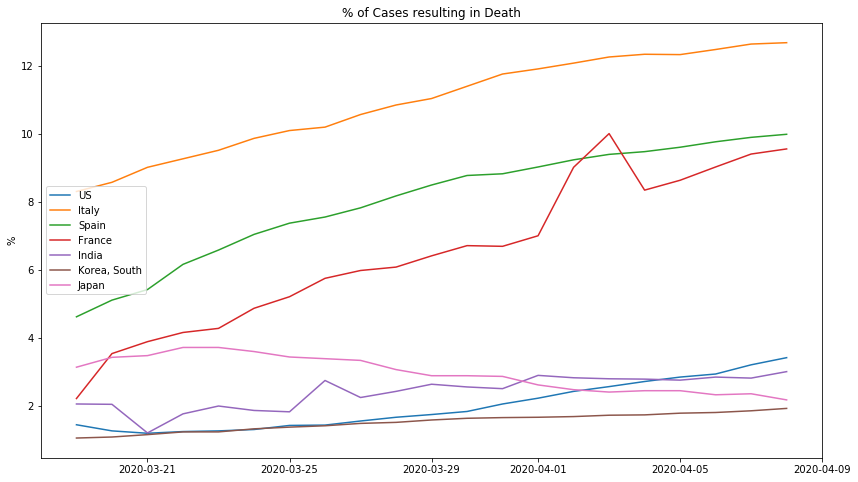

In [464]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

maxdays = 21
maxctys = 15
countries = ['US','Italy','Spain','France','India','Korea, South','Japan']

df_gfat = dfc_g.copy()

for col in df_gfat.columns:
    df_gfat[col] = (dfd_g[col] / df_gfat[col]).mul(100).round(2)
df_gfat = df_gfat.fillna(0)
display(df_gfat.tail())
    
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('% of Cases resulting in Death')
ax1.set_ylabel('%')  # we already handled the x-label with ax1
lines2 = ax1.plot(df_gfat.tail(maxdays).index, df_gfat.tail(maxdays)[countries])
for c,line in enumerate(lines2):
    line.set_label(countries[c])    
ax1.legend(loc='center left')
plt.show()

plt.show()


,2020-04-08 00:00:00 %
Country/Region,
Algeria,13.04
Italy,12.67
San Marino,12.19
United Kingdom,11.57
Netherlands,10.90
Congo (Kinshasa),10.00
Spain,9.98
Belgium,9.57
France,9.55


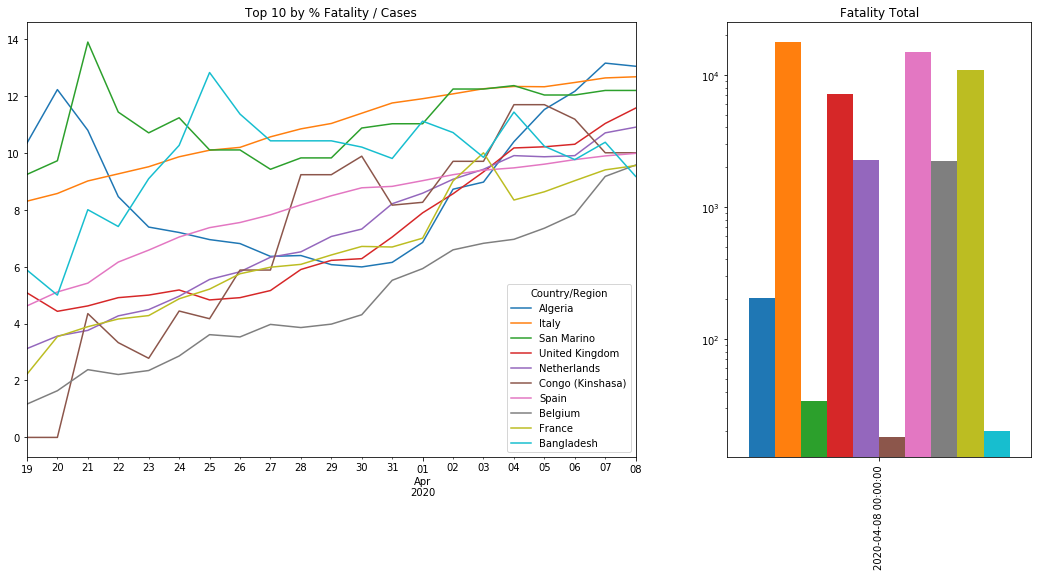

In [465]:
minct = 100
maxdays = 21
maxctys = 10

# sorted only if death count > 100, must transpose first to filter by row
df_gfat2 = dfc_g.copy().transpose()
df_gfat2 = df_gfat2[df_gfat2[df_gfat2.columns[-1]] > minct].transpose()

for col in df_gfat2.columns:
    df_gfat2[col] = (dfd_g[col] / df_gfat2[col]).mul(100).round(2)
df_gfat2 = df_gfat2.fillna(0)
df_gfat2 = df_gfat2.sort_values(df_gfat2.iloc[-1:,:].index.values[0], axis=1, ascending=False)   # column order seems to control legend order
# display(df_gfat2)

dfd_g2 = df_gfat2.copy()  # to hold deaths
for col in dfd_g2.columns:
    dfd_g2[col] = dfd_g[col]
dfd_g2 = dfd_g2.fillna(0)
# display(dfd_g2)

fig, axs = plt.subplots(1,2, sharex=False, figsize=(18,8), gridspec_kw={'width_ratios': [2, 1]})

df_gfat2.iloc[:,0:maxctys].tail(maxdays).plot(ax=axs[0], title='Top 10 by % Fatality / Cases')
dfd_g2.iloc[:,0:maxctys].tail(1).plot(kind='bar',width=3, ax=axs[1], title='Fatality Total', logy=True)
axs[1].get_legend().remove()

display(df_gfat2.iloc[-1:,:].transpose().head(maxctys).rename(columns=lambda x: str(x) + ' %'))


# Lame Stuff Overlay w/ S&P500 from Yahoooo 

In [466]:
#yahoo S&P
sp_df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=1581897600&period2=1609372800&interval=1d&events=history')
sp_df = sp_df.set_index('Date')

# create a single table w/ close, states, totalcases
merged_df = pd.merge(left=dfc_g, right=sp_df, left_index=True, right_index=True, how='left')
merged_df = merged_df.fillna(method='backfill')  # fill weekends blanks
merged_df['Global'] = merged_df[merged_df.columns[0:50]].sum(axis=1)

merged_df[['Close','Open','High','Low','US','Iran','Italy','Spain','China','Japan','Global']].tail()

,Close,Open,High,Low,US,Iran,Italy,Spain,China,Japan,Global
2020-04-04,2663.679932,2578.280029,2676.850098,2574.570068,308850,55743,124632,126168,82543,3139,1164814
2020-04-05,2663.679932,2578.280029,2676.850098,2574.570068,337072,58226,128948,131646,82602,3139,1237060
2020-04-06,2663.679932,2578.280029,2676.850098,2574.570068,366667,60500,132547,136675,82665,3654,1307715
2020-04-07,2659.409912,2738.649902,2756.889893,2657.669922,396223,62589,135586,141942,82718,3906,1386206
2020-04-08,2749.979980,2685.000000,2760.750000,2663.300049,429052,64586,139422,148220,82809,4257,1468446


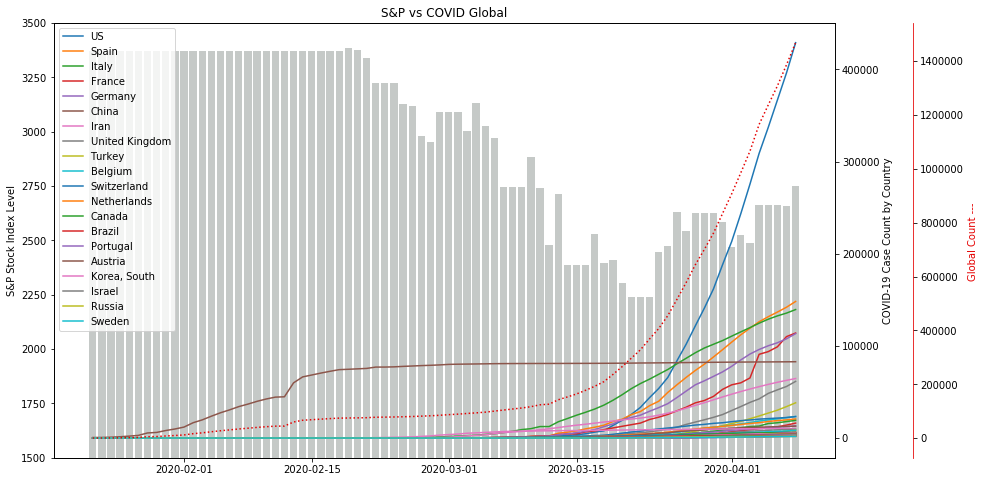

In [467]:
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('S&P vs COVID Global')

ax1.set_ylabel('S&P Stock Index Level')  # we already handled the x-label with ax1
ax1.set(ylim=[1500, 3500]) 
ax1.bar(merged_df.index, merged_df['Close'], color='xkcd:silver')

ax2 = ax1.twinx()
ax2.set_ylabel('COVID-19 Case Count by Country')  # we already handled the x-label with ax1
lines = ax2.plot(merged_df.index, merged_df[merged_df.columns[0:50]])
for c,line in enumerate(lines[0:20]):
    line.set_label(merged_df.columns[c])
ax2.legend(loc='upper left')

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.1))
ax3.spines["right"].set_color('xkcd:red')
ax3.set_ylabel('Global Count --- ', color='xkcd:red')  
ax3.plot(merged_df.index, merged_df['Global'], color='xkcd:red', linestyle=':')
plt.show()


# More Overlaps (Cases - Deaths) - WIP

2020-01-22     555
2020-01-23     654
2020-01-24     941
2020-01-25    1434
2020-01-26    2118
dtype: int64

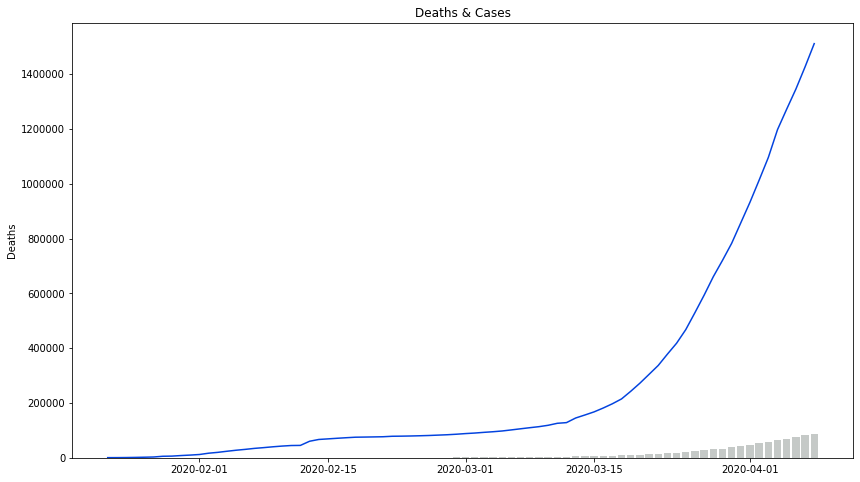

In [468]:
# more overlays -- lets try -- deaths bar, cases line1
dfd_gt = dfd_g.transpose() 
dfc_gt = dfc_g.transpose()

#plotting overlays fun 
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('Deaths & Cases')

dfc_gsum = dfc_g.sum(axis=1)
dfd_gsum = dfd_g.sum(axis=1)
display(dfc_gsum.head())

ax1.set_ylabel('Deaths')  # we already handled the x-label with ax1
ax1.bar(dfd_gsum.index, dfd_gsum, color='xkcd:silver')
ax1.plot(dfc_gsum.index, dfc_gsum, color='xkcd:blue')

plt.show()


## Top N-Countries by total cases..


In [469]:
maxdays = 10
maxctys = 15

dfd_g2 = dfd_g.transpose()
dfc_g2 = dfc_g.transpose()
display('top countries', dfc_g2.sort_values(by=[dfc_g2.columns[-1]], ascending=False).head(maxctys).iloc[:,-maxdays:])
display('top countries d', dfd_g2.sort_values(by=[dfd_g2.columns[-1]], ascending=False).head(3).iloc[:,-maxdays:])

'top countries'

,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08
Country/Region,,,,,,,,,,
US,161837,188172,213372,243616,275586,308850,337072,366667,396223,429052
Spain,87956,95923,104118,112065,119199,126168,131646,136675,141942,148220
Italy,101739,105792,110574,115242,119827,124632,128948,132547,135586,139422
France,45170,52827,57749,59929,65202,90848,93773,98963,110065,113959
Germany,66885,71808,77872,84794,91159,96092,100123,103374,107663,113296
China,82198,82279,82361,82432,82511,82543,82602,82665,82718,82809
Iran,41495,44605,47593,50468,53183,55743,58226,60500,62589,64586
United Kingdom,22453,25481,29865,34173,38689,42477,48436,52279,55949,61474
Turkey,10827,13531,15679,18135,20921,23934,27069,30217,34109,38226


'top countries d'

,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08
Country/Region,,,,,,,,,,
Italy,11591,12428,13155,13915,14681,15362,15887,16523,17127,17669
Spain,7716,8464,9387,10348,11198,11947,12641,13341,14045,14792
US,2978,3873,4757,5926,7087,8407,9619,10783,12722,14695


## Random analysis of various countries

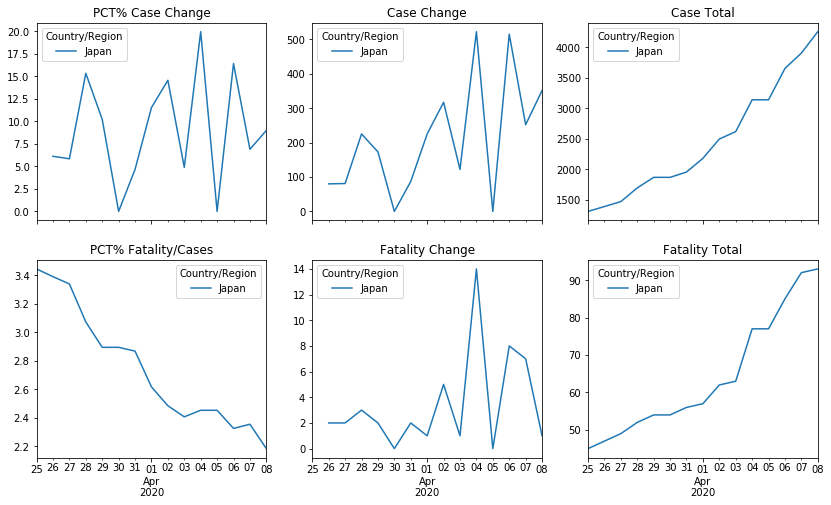

Country/Region,Japan
2020-03-25,NaN
2020-03-26,NaN
2020-03-27,NaN
2020-03-28,129.0
2020-03-29,160.0
2020-03-30,133.0
2020-03-31,87.0
2020-04-01,104.0
2020-04-02,210.0
2020-04-03,221.0


In [491]:
# ad hoc overlays
countries = ['Italy','US','Spain','France','Germany']
countries = ['Japan']
maxdays = 15

fig, axs = plt.subplots(2,3, figsize=(14, 8), sharex=True)
dfc_g3 = dfc_g2.transpose().tail(maxdays).transpose().sort_index()
dfd_g3 = dfd_g2.transpose().tail(maxdays).transpose().sort_index()

pctline = dfc_g3[dfc_g3.index.isin(countries)].pct_change(axis=1).transpose().mul(100).plot(ax=axs[0,0], title='PCT% Case Change')
chgline = dfc_g3[dfc_g3.index.isin(countries)].diff(axis=1).transpose().plot(ax=axs[0,1], title='Case Change')
actline = dfc_g3[dfc_g3.index.isin(countries)].tail(maxdays).transpose().plot(ax=axs[0,2], title='Case Total')

#i'd like to get the colors to be the same... 
pctline = (dfd_g3[dfd_g3.index.isin(countries)]/dfc_g3[dfc_g3.index.isin(countries)]).transpose().mul(100).plot(ax=axs[1,0], title='PCT% Fatality/Cases')
chgline = dfd_g3[dfd_g3.index.isin(countries)].diff(axis=1).transpose().plot(ax=axs[1,1], title='Fatality Change')
actline = dfd_g3[dfd_g3.index.isin(countries)].transpose().plot(ax=axs[1,2], title='Fatality Total')
plt.show()


dfc_g3[dfc_g3.index.isin(countries)].diff(axis=1).transpose().rolling(3, axis=0).mean().round(0)

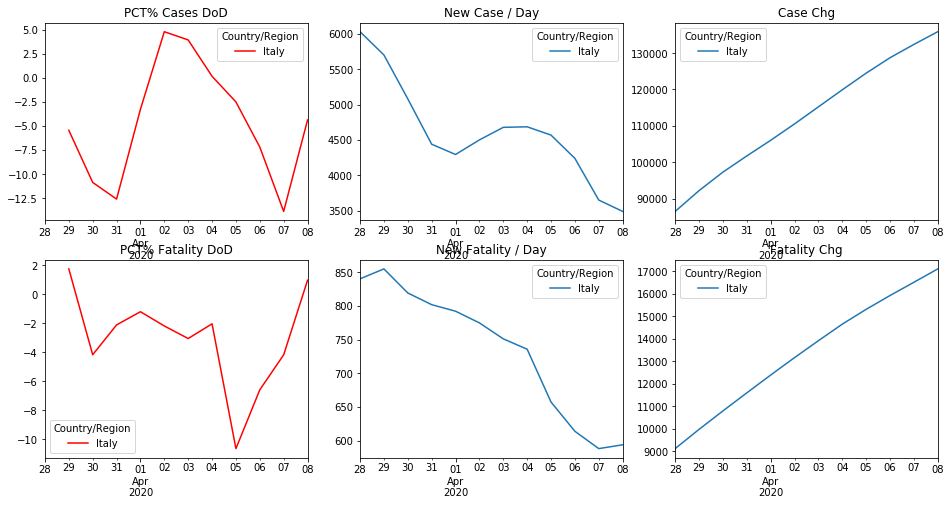

Country/Region,Italy
2020-03-25,NaN
2020-03-26,NaN
2020-03-27,NaN
2020-03-28,NaN
2020-03-29,-0.054517
2020-03-30,-0.108713
2020-03-31,-0.126042
2020-04-01,-0.032658
2020-04-02,0.047963
2020-04-03,0.039399


Country/Region,Italy
2020-03-25,NaN
2020-03-26,NaN
2020-03-27,NaN
2020-03-28,NaN
2020-03-29,0.017460
2020-03-30,-0.041732
2020-03-31,-0.021164
2020-04-01,-0.012058
2020-04-02,-0.021886
2020-04-03,-0.030551


In [471]:
# rolling 3 day to smooth out 
countries = ['Italy']
maxdays3 = maxdays-3  # trim the rolling/diff 3 days

fig, axs = plt.subplots(2,3, figsize=(16, 8), sharex=False, )

dfd_g2r = dfd_g3.rolling(window=3, axis=1).mean().sort_index()
dfc_g2r = dfc_g3.rolling(window=3, axis=1).mean().sort_index()

colors=['Red','Orange','Blue','Green']
pctline = dfc_g2r[dfc_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail(maxdays3).mul(100).plot(ax=axs[0,0], title='PCT% Cases DoD', color=colors)
chgline = dfc_g2r[dfc_g2r.index.isin(countries)].diff(axis=1).transpose().tail(maxdays3).plot(ax=axs[0,1], title='New Case / Day')
actline = dfc_g2r[dfc_g2r.index.isin(countries)].transpose().tail(maxdays3).plot(ax=axs[0,2], title='Case Chg')

pctline = dfd_g2r[dfd_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail(maxdays3).mul(100).plot(ax=axs[1,0], title='PCT% Fatality DoD' ,color=colors)
chgline = dfd_g2r[dfd_g2r.index.isin(countries)].diff(axis=1).transpose().tail(maxdays3).plot(ax=axs[1,1], title='New Fatality / Day')
actline = dfd_g2r[dfd_g2r.index.isin(countries)].transpose().tail(maxdays3).plot(ax=axs[1,2], title='Fatality Chg')
plt.show()

display(dfc_g2r[dfc_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail(maxdays))
display(dfd_g2r[dfd_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail(maxdays))


# Rival Countries

Country/Region,India,Pakistan
2020-04-04,3082,2818
2020-04-05,3588,3157
2020-04-06,4778,3766
2020-04-07,5311,4035
2020-04-08,5916,4263


Country/Region,India,Pakistan
2020-04-04,86,41
2020-04-05,99,47
2020-04-06,136,53
2020-04-07,150,57
2020-04-08,178,61


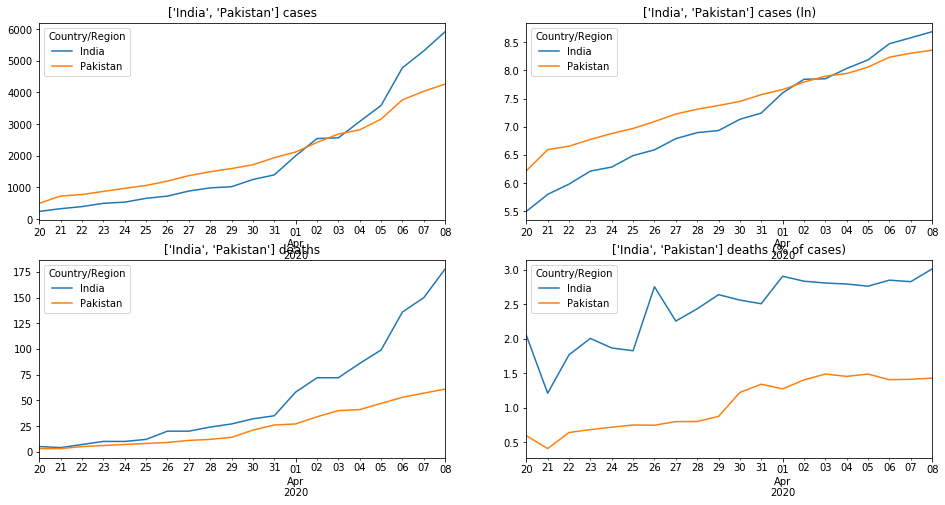

In [472]:
maxdays = 20
countries = ['India','Pakistan']

fig, axs = plt.subplots(2,2, figsize=(16, 8), sharex=False )

dfc_g[countries].tail(maxdays).plot(title=str(countries)+' cases', ax=axs[0,0])
dfc_g[countries].apply(np.log).tail(maxdays).plot(title=str(countries)+' cases (ln)', ax=axs[0,1])

dfd_g[countries].tail(maxdays).plot(title=str(countries)+' deaths', ax=axs[1,0])
(dfd_g[countries] / dfc_g[countries]).mul(100).tail(maxdays).plot(title=str(countries)+' deaths (% of cases)', ax=axs[1,1])

display(dfc_g[countries].tail(5))
display(dfd_g[countries].tail(5))


Country/Region,Belgium,Netherlands,Luxembourg
2020-04-04,18431,16727,2729
2020-04-05,19691,17953,2804
2020-04-06,20814,18926,2843
2020-04-07,22194,19709,2970
2020-04-08,23403,20682,3034


Country/Region,Belgium,Netherlands,Luxembourg
2020-04-04,1283,1656,31
2020-04-05,1447,1771,36
2020-04-06,1632,1874,41
2020-04-07,2035,2108,44
2020-04-08,2240,2255,46


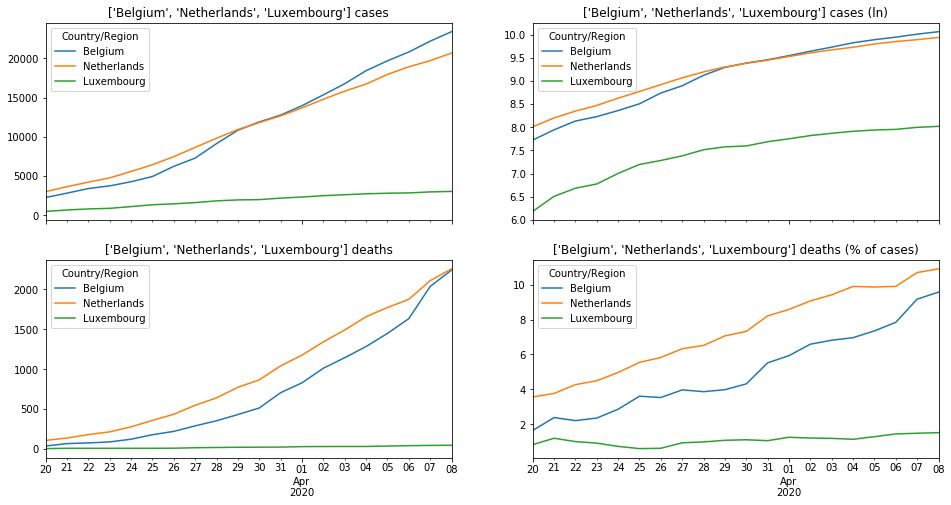

In [473]:
# benelux
maxdays = 20
countries = ['Belgium','Netherlands','Luxembourg']


fig, axs = plt.subplots(2,2, figsize=(16, 8), sharex=True, )

dfc_g[countries].tail(maxdays).plot(title=str(countries)+' cases', ax=axs[0,0])
dfc_g[countries].apply(np.log).tail(maxdays).plot(title=str(countries)+' cases (ln)', ax=axs[0,1])

dfd_g[countries].tail(maxdays).plot(title=str(countries)+' deaths', ax=axs[1,0])
(dfd_g[countries] / dfc_g[countries]).mul(100).tail(maxdays).plot(title=str(countries)+' deaths (% of cases)', ax=axs[1,1])

display(dfc_g[countries].tail(5))
display(dfd_g[countries].tail(5))

Country/Region,Finland,Norway,Sweden
2020-04-04,1882,5550,6443
2020-04-05,1927,5687,6830
2020-04-06,2176,5865,7206
2020-04-07,2308,6086,7693
2020-04-08,2487,6086,8419


Country/Region,Finland,Norway,Sweden
2020-04-04,25,62,373
2020-04-05,28,71,401
2020-04-06,27,76,477
2020-04-07,34,89,591
2020-04-08,40,101,687


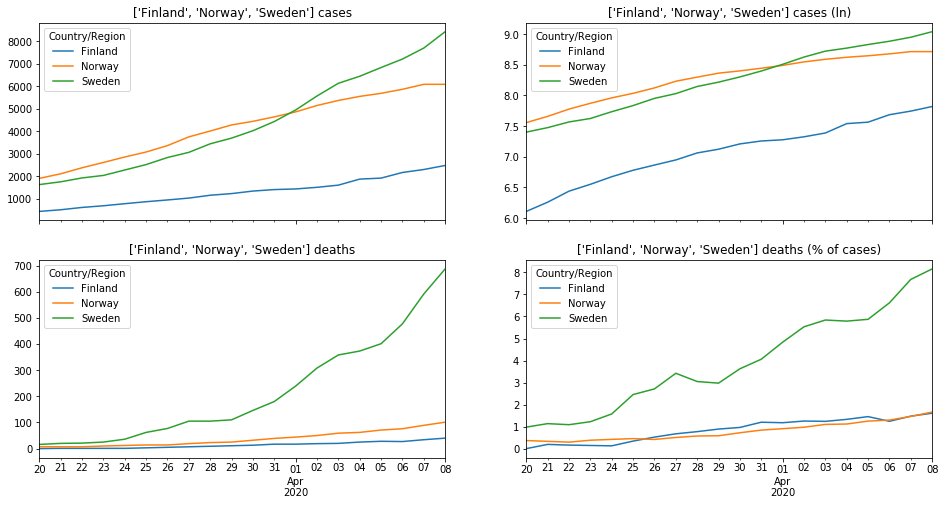

In [474]:
# nordics
maxdays = 20
countries = ['Finland','Norway','Sweden']


fig, axs = plt.subplots(2,2, figsize=(16, 8), sharex=True, )

dfc_g[countries].tail(maxdays).plot(title=str(countries)+' cases', ax=axs[0,0])
dfc_g[countries].apply(np.log).tail(maxdays).plot(title=str(countries)+' cases (ln)', ax=axs[0,1])

dfd_g[countries].tail(maxdays).plot(title=str(countries)+' deaths', ax=axs[1,0])
(dfd_g[countries] / dfc_g[countries]).mul(100).tail(maxdays).plot(title=str(countries)+' deaths (% of cases)', ax=axs[1,1])

display(dfc_g[countries].tail(5))
display(dfd_g[countries].tail(5))


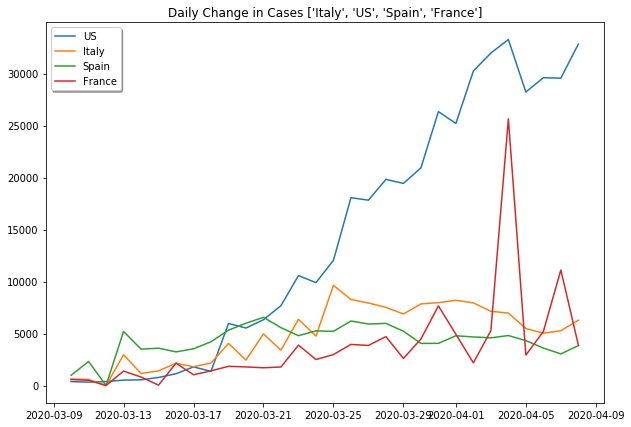

Country/Region,US,Spain,Italy,France
2020-04-04,33264.0,6969.0,4805.0,25646.0
2020-04-05,28222.0,5478.0,4316.0,2925.0
2020-04-06,29595.0,5029.0,3599.0,5190.0
2020-04-07,29556.0,5267.0,3039.0,11102.0
2020-04-08,32829.0,6278.0,3836.0,3894.0


In [475]:
# global rate
maxdays = 30
countries = ['Italy','US','Spain','France']
sorthack = ['US','Italy','Spain','France']

dfc_gdiff= dfc_g.transpose().sum().diff()

plt.figure(figsize=(10,7)) 
plt.plot(dfc_g2[dfc_g2.index.isin(countries)].diff(axis=1).transpose().tail(maxdays))
# plt.plot(dfc_gdiff.tail(30))
plt.legend(sorthack, loc='upper left', shadow=True)  # bit of pain to name these manually in order
plt.title('Daily Change in Cases '+str(countries))

plt.show()
display(dfc_g2[dfc_g2.index.isin(countries)].diff(axis=1).transpose().tail(5))


,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08
Country/Region,,,,,,,,,,
US,141408.0,163639.0,187794.0,215053.0,244191.0,276017.0,307169.0,337530.0,366654.0,397314.0
Spain,80434.0,87996.0,95999.0,104035.0,111794.0,119144.0,125671.0,131496.0,136754.0,142279.0
Italy,97300.0,101740.0,106035.0,110536.0,115214.0,119900.0,124469.0,128709.0,132360.0,135852.0
Germany,62225.0,66929.0,72188.0,78158.0,84608.0,90682.0,95791.0,99863.0,103720.0,108111.0
France,41328.0,46235.0,51915.0,56835.0,60960.0,71993.0,83274.0,94528.0,100934.0,107662.0
China,82106.0,82200.0,82279.0,82357.0,82435.0,82495.0,82552.0,82603.0,82662.0,82731.0
Iran,38404.0,41470.0,44564.0,47555.0,50415.0,53131.0,55717.0,58156.0,60438.0,62558.0
United Kingdom,19848.0,22571.0,25933.0,29840.0,34242.0,38446.0,43201.0,47731.0,52221.0,56567.0
Turkey,9149.0,11192.0,13346.0,15782.0,18245.0,20997.0,23975.0,27073.0,30465.0,34184.0


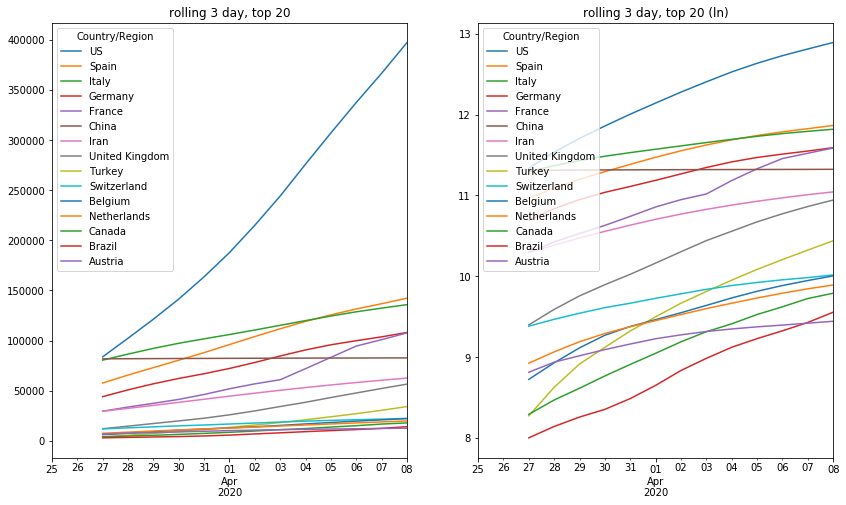

In [476]:
# rolling 3 day average highs
fig, axs = plt.subplots(1,2)

df_roll = dfc_g3.rolling(3,axis=1,center=False).mean().round()
df_roll = df_roll.sort_values(by=[df_roll.columns[-1]], ascending=False).head(15)
display(df_roll.iloc[:,-10:])
df_roll.iloc[:,-28:].transpose().plot(figsize=(14,8),title='rolling 3 day, top 20',ax=axs[0])
df_roll.iloc[:,-28:].transpose().apply(np.log).plot(figsize=(14,8),title='rolling 3 day, top 20 (ln)',ax=axs[1])



# Global Population Comparisons

In [477]:
# GLobal Population 
# https://github.com/datasets/population/blob/master/data/population.csv

df_gpop = pd.read_csv('https://raw.githubusercontent.com/datasets/population/master/data/population.csv')
df_gpop_2016 = df_gpop[df_gpop['Year'] == 2016]
df_gpop_2016 = df_gpop_2016.rename(columns={'Country Name': 'Country/Region'})

display(df_gpop_2016.shape, df_gpop_2016.head(3), dfc_g.transpose().shape, dfc_g.tail(1).transpose().head(3))  #262 countries

df_gmerged = pd.merge(left=dfc_g.tail(1).transpose(), right=df_gpop_2016, on='Country/Region', how='outer')
df_gmerged = df_gmerged.rename(columns={df_gmerged.columns[1]:'Cases', 'Value':'Population'})
df_gmerged['% of pop'] = (df_gmerged['Cases'] / df_gmerged['Population']).mul(100).round(2)

display(df_gmerged.shape, df_gmerged.sort_values(by=['% of pop'], ascending=False).head())


(262, 4)

,Country/Region,Country Code,Year,Value
56,Arab World,ARB,2016,406452690.0
113,Caribbean small states,CSS,2016,7245472.0
170,Central Europe and the Baltics,CEB,2016,102974082.0


(184, 78)

,2020-04-08
Country/Region,
US,429052
Spain,148220
Italy,139422


(290, 6)

,Country/Region,Cases,Country Code,Year,Population,% of pop
96,San Marino,279.0,SMR,2016.0,33203.0,0.84
79,Andorra,564.0,AND,2016.0,77281.0,0.73
35,Luxembourg,3034.0,LUX,2016.0,582972.0,0.52
52,Iceland,1616.0,ISL,2016.0,334252.0,0.48
1,Spain,148220.0,ESP,2016.0,46443959.0,0.32


C:\Users\dougc\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: `item` has been deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()
C:\Users\dougc\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: `item` has been deprecated and will be removed in a future version


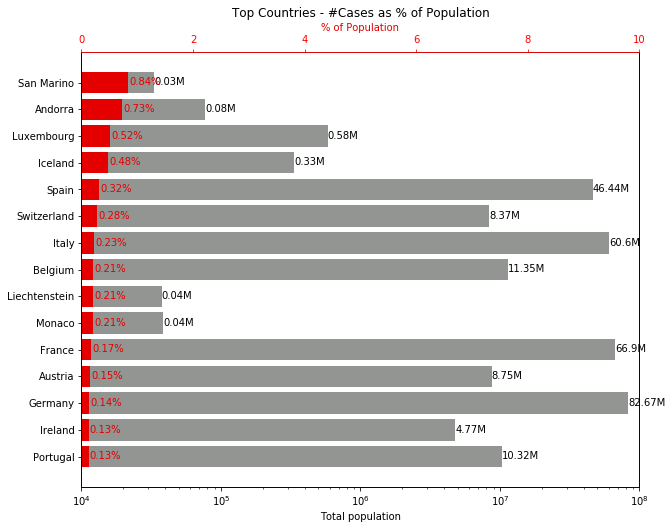

In [478]:
max_ctys = 15
fig,ax1 = plt.subplots(figsize=(10, 8)) 

df_gmerged_h = df_gmerged.sort_values(by=['% of pop'],ascending=False).head(max_ctys)

ax1.set_xscale('log')
ax1.set(xlim=[10**4, 10**8])   # get max min +/- buffer
ax1.set_xlabel('Total population')  
ax1.barh(df_gmerged_h['Country/Region'], df_gmerged_h['Population'], color='xkcd:grey')
for n,i in enumerate(ax1.patches):
    ax1.text(i.get_width()+.02, i.get_y()+.5,str(df_gmerged_h['Population'].div(1000000).round(2).iloc[n:n+1].item()) + 'M', color='xkcd:black')

    
ax2 = ax1.twiny()
ax2.set_xscale('linear')
ax2.set(xlim=[0, 10])   # get max min +/- buffer
ax2.set_xlabel('% of Population', color='xkcd:red')  
ax2.spines['top'].set_color('red')
ax2.tick_params(axis='x', colors='red')
ax2.barh(df_gmerged_h['Country/Region'], df_gmerged_h['% of pop'], color='xkcd:red')
for n,i in enumerate(ax2.patches):
    ax2.text(i.get_width()+.02, i.get_y()+.5,str(df_gmerged_h['% of pop'].iloc[n:n+1].item()) + '%', color='xkcd:red')
plt.title('Top Countries - #Cases as % of Population')
plt.gca().invert_yaxis()
plt.show()

# Emerging Markets (>100 cases)

In [479]:
# EMERGING markets - > 100 but not biggest
minct = 100

dfc_g3 = dfc_g2.diff(axis=1)
dfc_g3.columns = pd.to_datetime(dfc_g3.columns)
dfc_g3p = dfc_g2.pct_change(axis=1).mul(100).round()
dfc_g3p.columns = pd.to_datetime(dfc_g3p.columns)

dfc_merge = pd.merge(left=dfc_g2, right=dfc_g3p, left_index=True, right_index=True, suffixes=('',' %chg'))
# weird it goes to timestamp now
dfc_merge = dfc_merge.reindex(sorted(dfc_merge.columns), axis=1)
dfc_merge = dfc_merge[dfc_merge[dfc_merge.columns[-2]] > minct]

display('top 20 growth countries, > 100 cases', 
        dfc_merge.sort_values(by=dfc_merge.columns[-1], ascending=False).head(20).iloc[:,-6:].rename(columns=lambda x: x.replace('00:00:00','').replace('2020-','')))


'top 20 growth countries, > 100 cases'

,04-06,04-06 %chg,04-07,04-07 %chg,04-08,04-08 %chg
Country/Region,,,,,,
Djibouti,90,53.0,90,0.0,135,50.0
Peru,2561,12.0,2954,15.0,4342,47.0
Bangladesh,123,40.0,164,33.0,218,33.0
Belarus,700,25.0,861,23.0,1066,24.0
Niger,253,38.0,278,10.0,342,23.0
Ecuador,3747,3.0,3747,0.0,4450,19.0
Kyrgyzstan,216,47.0,228,6.0,270,18.0
Slovakia,534,10.0,581,9.0,682,17.0
Russia,6343,18.0,7497,18.0,8672,16.0


# Global Heatmap (Using Shape Files) - WIP


I wanted to map by country, but need to find a country equivalent of a FIPS code (or match by country name to a map file).

Another way is to use GPS (Long/Lat) geocordinates and a Map (shape file).   However my global data is sometimes clumped into one lat/long for some countrues like Japan and US, and detailed locations in places like France.

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,last
107,France,3.9339,-53.1258,0,0,0,0,0,0,0,...,43,51,51,57,61,61,72,72,77,77
108,France,-17.6797,149.4068,0,0,0,0,0,0,0,...,36,37,37,39,40,41,42,47,51,51
109,France,16.2500,-61.5833,0,0,0,0,0,0,0,...,114,125,128,130,134,135,135,139,141,141
110,France,-12.8275,45.1662,0,0,0,0,0,0,0,...,94,94,116,128,134,147,147,171,171,171
111,France,-20.9043,165.6180,0,0,0,0,0,0,0,...,16,16,18,18,17,18,18,18,18,18
112,France,-21.1351,55.2471,0,0,0,0,0,0,0,...,247,281,308,321,334,344,349,358,358,358
113,France,17.9000,-62.8333,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
114,France,18.0708,-63.0501,0,0,0,0,0,0,0,...,15,15,22,22,24,32,32,32,32,32
115,France,14.6415,-61.0242,0,0,0,0,0,0,0,...,128,135,138,143,145,149,151,152,154,154
116,France,46.2276,2.2137,0,0,2,3,3,3,4,...,52128,56989,59105,64338,89953,92839,98010,109069,112950,112950


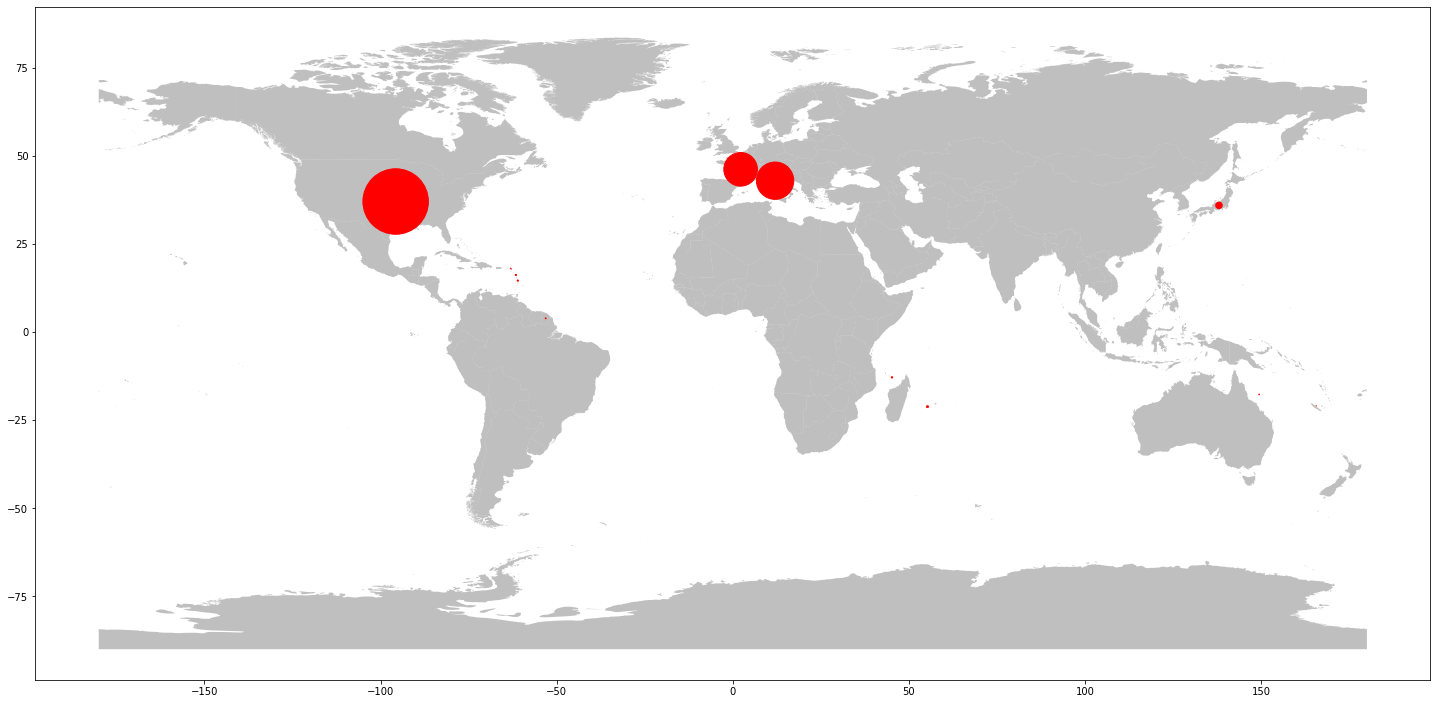

In [480]:
# country shape file https://hub.arcgis.com/datasets/UIA::uia-latitude-longitude-graticules-and-world-countries-boundaries?geometry=-144.961%2C-72.317%2C-179.414%2C79.981&layer=1
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

gmap = gpd.read_file('maps/Countries_WGS84.shp')

# remove hi/ak for now
dfc_geo = dfc_graw.drop(columns=['Province/State'])
dfc_geo['last'] = dfc_geo[dfc_geo.columns[-1]]
dfc_geo = dfc_geo[dfc_geo['Country/Region'].isin(['US','Italy','Japan','France'])]
display(dfc_geo)


geometry = [Point(xy) for xy in zip(dfc_geo["Long"],dfc_geo["Lat"]) ] 
geo_df = gpd.GeoDataFrame(dfc_geo,crs={"init": "EPSG:7030"},geometry=geometry)
geo_df = geo_df[['Country/Region','last','geometry']]

fig, ax = plt.subplots(figsize=(25,25))
gmap.plot(ax=ax, alpha=0.5, color='grey')

#geo_df.plot(ax=ax, markersize=20, cmap='Reds', label='cases')
geo_df.plot(ax=ax, markersize=dfc_geo['last'].div(100), color='red', label='cases')   # size on last
